In [174]:
import numpy as np
import pandas as pd

In [175]:
match = pd.read_csv('/media/smayan/ohio/IPL Win Probability/Data/matches.csv')
delivery = pd.read_csv('/media/smayan/ohio/IPL Win Probability/Data/deliveries.csv')

In [176]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [177]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum(['total_runs']).reset_index()

In [178]:
total_score_df

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,1312,456,0,5,0,1,1,0,200,7,207
1,1,2,1259,444,0,4,0,1,1,0,166,6,172
2,2,1,1323,455,0,6,1,1,0,0,176,8,184
3,2,2,1270,435,0,3,0,1,0,0,183,4,187
4,3,1,1280,434,0,2,0,2,0,0,179,4,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,11413,2,1301,448,0,4,1,0,0,0,165,5,170
1524,11414,1,1294,441,0,2,0,5,1,0,147,8,155
1525,11414,2,1160,413,0,6,0,5,0,0,151,11,162
1526,11415,1,1287,447,0,3,0,0,0,0,149,3,152


In [179]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [180]:
total_score_df

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,1312,456,0,5,0,1,1,0,200,7,207
2,2,1,1323,455,0,6,1,1,0,0,176,8,184
4,3,1,1280,434,0,2,0,2,0,0,179,4,183
6,4,1,1325,457,0,5,0,1,0,0,157,6,163
8,5,1,1297,448,0,4,0,2,0,0,151,6,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,11347,1,1381,480,0,7,0,2,1,0,133,10,143
1520,11412,1,1306,449,0,1,0,1,3,0,131,5,136
1522,11413,1,1378,482,0,6,0,2,1,0,162,9,171
1524,11414,1,1294,441,0,2,0,5,1,0,147,8,155


In [181]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [182]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [183]:
teams = ['Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Delhi Capitals']

In [184]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [185]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [186]:
match_df.shape

(641, 20)

In [187]:
match_df = match_df[match_df['dl_applied'] == 0]

In [188]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [189]:
delivery_df = match_df.merge(delivery,on='match_id')

In [190]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [191]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [192]:
delivery_df.dtypes

match_id             int64
city                object
winner              object
total_runs_x         int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs_y         int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [193]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].transform('cumsum')

In [194]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] + 1

In [195]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [196]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].transform('cumsum').values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [197]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [198]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [199]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0


In [200]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [201]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [202]:
final_df = final_df.sample(final_df.shape[0])  #Shuffling the data to prevent any bias

In [203]:
final_df['city'].dropna(inplace=True)

In [204]:
final_df = final_df[final_df['balls_left'] != 0]

In [205]:
from sklearn.model_selection import train_test_split
X = final_df.drop('result', axis=1)
y = final_df['result']
np.random.seed(1)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [210]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])


In [211]:
pipe.fit(X_train,y_train)

/media/smayan/ohio/conda env/env/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [212]:
y_pred = pipe.predict(X_test)


In [213]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8034638032559751

In [214]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [215]:
def match_progression(x_df, match_id, pipe):
    # Filter the match data based on match_id and overs (ball == 6 indicates end of over)
    match = x_df[(x_df['match_id'] == match_id) & (x_df['ball'] == 6)]
    
    # Select relevant columns and drop rows with missing values
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets',
                     'total_runs_x', 'crr', 'rrr']].dropna()
    
    # Exclude rows where 'balls_left' is zero
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    # Predict probabilities of win/loss using the model pipeline
    result = pipe.predict_proba(temp_df)
    
    # Calculate and add 'lose' and 'win' probabilities
    temp_df['lose'] = np.round(result[:, 0] * 100, 1)
    temp_df['win'] = np.round(result[:, 1] * 100, 1)
    
    # Add a column to indicate the end of over number
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    # Calculate the target score (same for all rows)
    target = temp_df['total_runs_x'].values[0]
    
    # Calculate runs scored in each over
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)  # Insert target at the start of the list
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    # Calculate wickets lost in each over
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)  # Assume 10 wickets initially
    wickets.append(0)  # Add 0 to the end for the last over
    temp_df['wickets_in_over'] = (np.array(new_wickets) - np.array(wickets))[:temp_df.shape[0]]
    
    # Print the target score
    print("Target:", target)
    
    # Return the relevant columns and the target score
    return temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']], target


In [216]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target: 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,3,0,59.2,40.8
10467,2,8,0,53.6,46.4
10473,3,1,0,60.7,39.3
10479,4,7,1,71.7,28.3
10485,5,12,0,61.7,38.3
10491,6,13,0,49.3,50.7
10497,7,9,0,43.3,56.7
10505,8,15,0,29.0,71.0
10511,9,7,0,26.8,73.2
10518,10,17,0,14.7,85.3


Text(0.5, 1.0, 'Target-178')

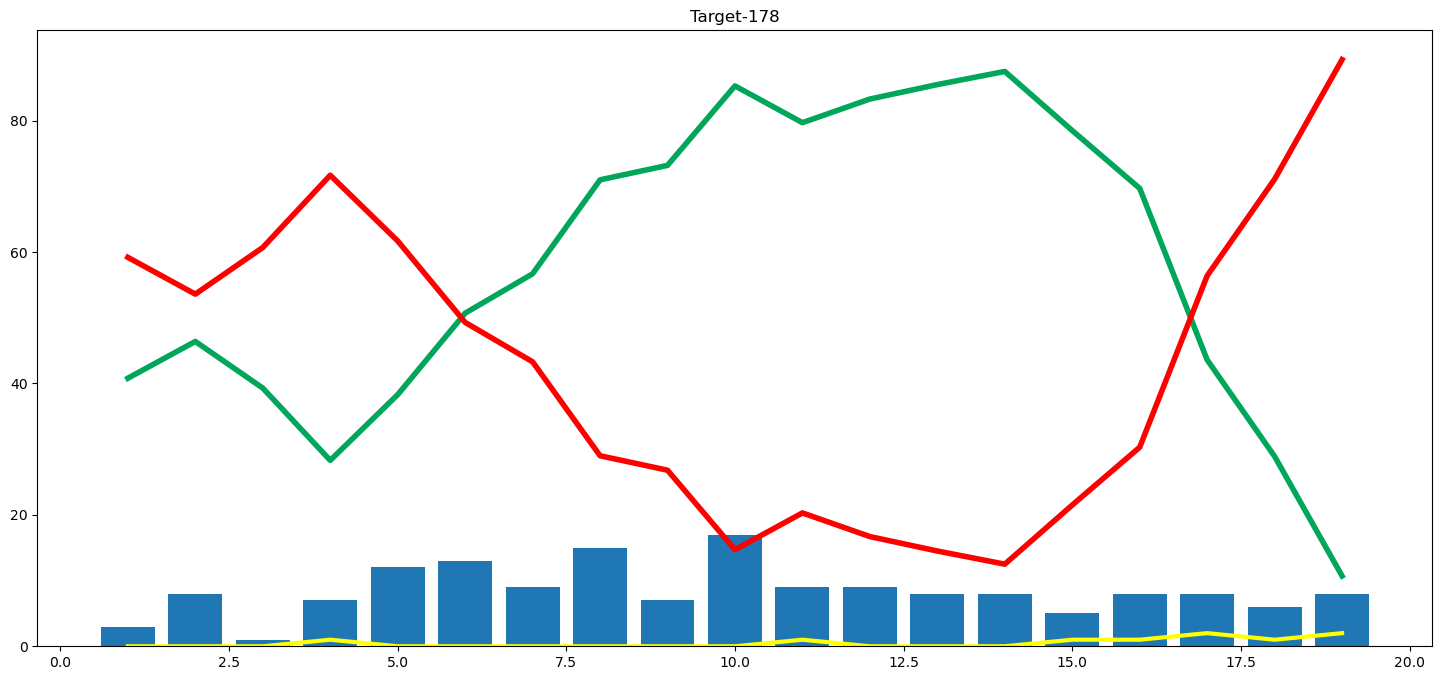

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [218]:
delivery_df['city'].unique()


array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [219]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))